<a href="https://colab.research.google.com/github/mleyvaz/computacion-paralela/blob/main/Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pycaret
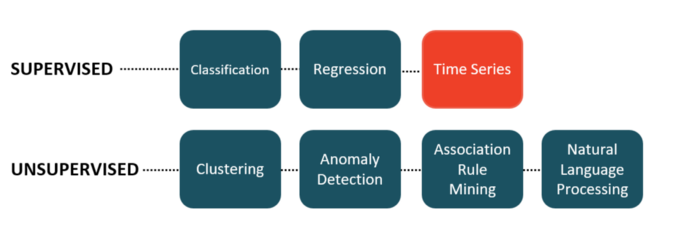

# Intalación

In [1]:
pip install pycaret

     |████████████████████████████████| 266kB 27.4MB/s 
     |████████████████████████████████| 2.0MB 38.0MB/s 
     |████████████████████████████████| 1.7MB 29.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4MB 31.3MB/s 
     |████████████████████████████████| 14.2MB 202kB/s 
     |████████████████████████████████| 276kB 32.0MB/s 
     |████████████████████████████████| 6.8MB 20.1MB/s 
     |████████████████████████████████| 174kB 47.1MB/s 
     |████████████████████████████████| 256kB 43.8MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 112kB 38.0MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 645kB 30.9MB/s 
     |████████████████████████████████| 1.1MB 34.8MB/

# Ciclo de vida de un proyecto de Machine Learning
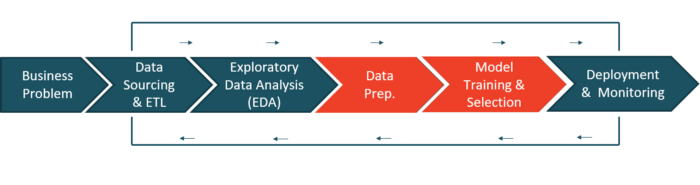

# Problema Comprar un Diamante

Datos

In [2]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171

Análisis exploratorio se datos

In [3]:
# plot scatter carat_weight and Price
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], 
                 facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Preparacion de los datos

In [4]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment = True, experiment_name = 'diamond')

Description           Value
0                               session_id            4507
1                                   Target           Price
2                            Original Data       (6000, 8)
3                           Missing Values           False
4                         Numeric Features               1
5                     Categorical Features               6
6                         Ordinal Features           False
7                High Cardinality Features           False
8                  High Cardinality Method            None
9                    Transformed Train Set      (4199, 28)
10                    Transformed Test Set      (1801, 28)
11                      Shuffle Train-Test            True
12                     Stratify Train-Test           False
13                          Fold Generator           KFold
14                             Fold Number              10
15                                CPU Jobs              -1
16                                 Use GPU           False
17                          Log Experiment            True
18                         Experiment Name         diamond
19                                     USI            fcbd
20                         Imputation Type          simple
21          Iterative Imputation Iteration            None
22                         Numeric Imputer            mean
23      Iterative Imputation Numeric Model            None
24                     Categorical Imputer        constant
25  Iterative Imputation Categorical Model            None
26           Unknown Categoricals Handling  least_frequent
27                               Normalize           False
28                        Normalize Method            None
29                          Transformation           False
30                   Transformation Method            None
31                                     PCA           False
32                              PCA Method            None
33                          PCA Components            None
34                     Ignore Low Variance           False
35                     Combine Rare Levels           False
36                    Rare Level Threshold            None
37                         Numeric Binning           False
38                         Remove Outliers           False
39                      Outliers Threshold            None
40                Remove Multicollinearity           False
41             Multicollinearity Threshold            None
42                              Clustering           False
43                    Clustering Iteration            None
44                     Polynomial Features           False
45                       Polynomial Degree            None
46                    Trignometry Features           False
47                    Polynomial Threshold            None
48                          Group Features           False
49                       Feature Selection           False
50                Feature Selection Method         classic
51            Features Selection Threshold            None
52                     Feature Interaction           False
53                           Feature Ratio           False
54                   Interaction Threshold            None
55                        Transform Target            True
56                 Transform Target Method         box-cox

Seleccionar Modelo 

In [5]:
# compare all models
best = compare_models()


Model        MAE           MSE  \
lightgbm  Light Gradient Boosting Machine   641.2641  1.859437e+06   
gbr           Gradient Boosting Regressor   760.6323  2.324377e+06   
rf                Random Forest Regressor   744.7987  2.388905e+06   
et                  Extra Trees Regressor   762.7051  2.470093e+06   
dt                Decision Tree Regressor   956.9994  4.285480e+06   
ada                    AdaBoost Regressor  1939.3502  1.591330e+07   
knn                 K Neighbors Regressor  3044.6252  3.574357e+07   
omp           Orthogonal Matching Pursuit  3303.2569  7.356962e+07   
lasso                    Lasso Regression  6655.3668  1.161616e+08   
en                            Elastic Net  6655.3668  1.161616e+08   
llar         Lasso Least Angle Regression  6655.3665  1.161615e+08   
par          Passive Aggressive Regressor  4619.7699  3.863338e+08   
ridge                    Ridge Regression  3339.6123  5.909891e+08   
br                         Bayesian Ridge  3438.2520  7.510530e+08   
huber                     Huber Regressor  3479.1577  8.147942e+08   
lr                      Linear Regression  3522.1928  9.375984e+08   

                RMSE      R2   RMSLE    MAPE  TT (Sec)  
lightgbm   1333.8465  0.9821  0.0669  0.0486     0.137  
gbr        1498.4691  0.9776  0.0770  0.0574     0.302  
rf         1523.1099  0.9769  0.0786  0.0577     1.169  
et         1544.3638  0.9762  0.0803  0.0593     1.311  
dt         2031.6808  0.9588  0.1030  0.0744     0.043  
ada        3948.2331  0.8481  0.1866  0.1497     0.269  
knn        5961.7496  0.6534  0.3602  0.2323     0.094  
omp        8458.8369  0.2500  0.2828  0.2217     0.028  
lasso     10746.0315 -0.1240  0.7161  0.5734     0.028  
en        10746.0315 -0.1240  0.7161  0.5734     0.029  
llar      10746.0309 -0.1240  0.7161  0.5734     0.296  
par       17040.5446 -2.8100  0.3458  0.2656     0.033  
ridge     19037.1355 -4.5615  0.2193  0.1688     0.026  
br        20897.1117 -5.8778  0.2205  0.1699     0.029  
huber     21566.5532 -6.2475  0.2232  0.1690     0.131  
lr        22405.8020 -7.3610  0.2218  0.1715     0.329

In [11]:
# Modelo paralelo
lightgbm = create_model('lightgbm',  multi_core = True)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     711.0602  1.839111e+06  1356.1383  0.9826  0.0680  0.0518
1     689.5659  1.771760e+06  1331.0748  0.9858  0.0729  0.0505
2     757.6406  2.739080e+06  1655.0166  0.9768  0.0725  0.0514
3     630.8057  1.285983e+06  1134.0118  0.9858  0.0680  0.0501
4     644.5736  2.252272e+06  1500.7572  0.9784  0.0642  0.0479
5     635.1877  3.195627e+06  1787.6317  0.9740  0.0616  0.0448
6     628.2603  2.564292e+06  1601.3407  0.9697  0.0704  0.0473
7     599.5594  9.327937e+05   965.8125  0.9893  0.0692  0.0505
8     551.3370  9.953812e+05   997.6879  0.9908  0.0624  0.0464
9     564.6510  1.018067e+06  1008.9933  0.9881  0.0594  0.0452
Mean  641.2641  1.859437e+06  1333.8465  0.9821  0.0669  0.0486
SD     60.6384  7.655343e+05   283.3555  0.0067  0.0044  0.0025

In [12]:
# check feature importance
plot_model(lightgbm, plot = 'feature')

Guardar  Modelo 

In [13]:
# finalize the model
final_best = finalize_model(lightgbm)
# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                    